In [1]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np

In [2]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
device_name = tf.test.gpu_device_name()

In [3]:
#set batch size and image size
batch_size = 32
img_height = 256
img_width = 256

In [4]:
#set directory
import os
direc = os.path.dirname(os.path.realpath('__file__'))
filename = direc+'/images'

In [5]:
#import training set
train_ds=tf.keras.utils.image_dataset_from_directory(
    filename ,
    labels='inferred',
    seed=123,
    subset='training',
    label_mode='int',
    color_mode='rgb',
    image_size=(img_height, img_width),
    validation_split=0.2
)

Found 13347 files belonging to 24 classes.
Using 10678 files for training.


In [6]:
#import validation set
validation_ds=tf.keras.utils.image_dataset_from_directory(
    filename,
    labels='inferred',
    seed=123,
    subset='validation',
    label_mode='int',
    color_mode='rgb',
    image_size=(img_height, img_width),
    validation_split=0.2
)

Found 13347 files belonging to 24 classes.
Using 2669 files for validation.


In [7]:
#get class names
class_names = train_ds.class_names
print(class_names)

['acura', 'audi', 'chevrolet', 'dodge', 'fiat', 'ford', 'gmc', 'honda', 'hyundai', 'infiniti', 'jeep', 'kia', 'lexus', 'mazda', 'mercedes', 'mini cooper', 'mitsubishi', 'nissan', 'porsche', 'scion', 'subaru', 'tesla', 'toyota', 'volkswagen']


2023-03-22 20:07:09.970219: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


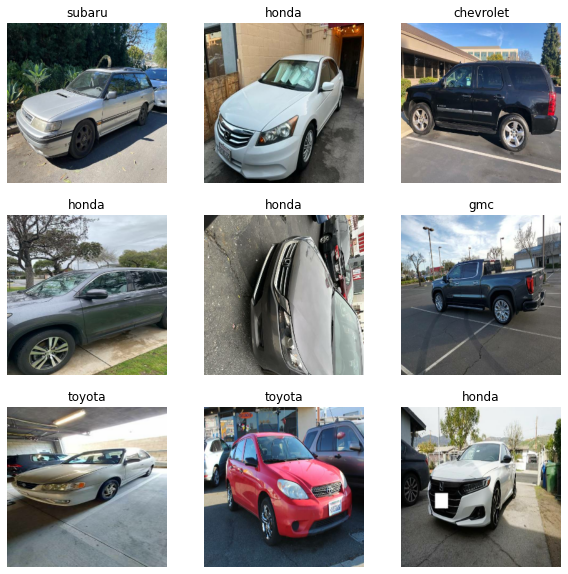

In [8]:
#plot data subset
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
#get image dimensions
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [10]:
num_classes = len(class_names)

## Baseline Image classification
-simple image standardization

-3 convolutional/max pooling layers

-one dense layer

-output layer

In [11]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [12]:
#adam optimizer, sparse categorical cross entropy used for loss
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [ ]:
#train model for 10 epochs
epochs=10
history = model.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=epochs
)

Epoch 1/10
334/334 [==============================] - 77s 227ms/step - loss: 2.7618 - accuracy: 0.1760 - val_loss: 2.7197 - val_accuracy: 0.2079
Epoch 2/10
334/334 [==============================] - 9s 25ms/step - loss: 2.5043 - accuracy: 0.2588 - val_loss: 2.5376 - val_accuracy: 0.2592
Epoch 3/10
334/334 [==============================] - 8s 24ms/step - loss: 1.5130 - accuracy: 0.5511 - val_loss: 2.6425 - val_accuracy: 0.3891
Epoch 4/10
334/334 [==============================] - 9s 25ms/step - loss: 0.4604 - accuracy: 0.8602 - val_loss: 3.8730 - val_accuracy: 0.4539
Epoch 5/10
334/334 [==============================] - 9s 25ms/step - loss: 0.1200 - accuracy: 0.9681 - val_loss: 5.0168 - val_accuracy: 0.4491
Epoch 6/10
334/334 [==============================] - 8s 24ms/step - loss: 0.0626 - accuracy: 0.9840 - val_loss: 5.0277 - val_accuracy: 0.4674
Epoch 7/10
334/334 [==============================] - 9s 25ms/step - loss: 0.0399 - accuracy: 0.9891 - val_loss: 5.3076 - val_accuracy: 0.45

## Second Model

-Doubled number of filters in each convolutional layer

In [ ]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(num_classes)
])

#adam optimizer, sparse categorical cross entropy used for loss
model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 128, 128, 32)     0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 128, 128, 32)      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                 

In [ ]:
#train for 20 epochs
epochs=20
history = model.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=epochs
)

Epoch 1/20
334/334 [==============================] - 11s 28ms/step - loss: 2.8320 - accuracy: 0.1610 - val_loss: 2.7792 - val_accuracy: 0.1794
Epoch 2/20
334/334 [==============================] - 9s 27ms/step - loss: 2.7598 - accuracy: 0.1658 - val_loss: 2.7623 - val_accuracy: 0.1794
Epoch 3/20
334/334 [==============================] - 9s 27ms/step - loss: 2.7546 - accuracy: 0.1687 - val_loss: 2.7426 - val_accuracy: 0.1794
Epoch 4/20
334/334 [==============================] - 9s 27ms/step - loss: 2.7460 - accuracy: 0.1711 - val_loss: 2.7401 - val_accuracy: 0.1757
Epoch 5/20
334/334 [==============================] - 9s 27ms/step - loss: 2.6919 - accuracy: 0.1876 - val_loss: 2.6916 - val_accuracy: 0.1951
Epoch 6/20
334/334 [==============================] - 9s 27ms/step - loss: 2.4828 - accuracy: 0.2488 - val_loss: 2.5742 - val_accuracy: 0.2468
Epoch 7/20
334/334 [==============================] - 9s 27ms/step - loss: 1.9710 - accuracy: 0.4022 - val_loss: 2.6268 - val_accuracy: 0.291

## Third Model

-Added Batch Normalization Layers to every layer

In [ ]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.BatchNormalization(),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

In [ ]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=epochs
)

Epoch 1/15
334/334 [==============================] - 15s 34ms/step - loss: 3.9471 - accuracy: 0.1560 - val_loss: 2.7905 - val_accuracy: 0.1891
Epoch 2/15
334/334 [==============================] - 11s 33ms/step - loss: 2.6477 - accuracy: 0.2127 - val_loss: 2.6995 - val_accuracy: 0.2116
Epoch 3/15
334/334 [==============================] - 11s 33ms/step - loss: 2.3738 - accuracy: 0.2912 - val_loss: 2.6819 - val_accuracy: 0.2255
Epoch 4/15
334/334 [==============================] - 11s 33ms/step - loss: 2.0055 - accuracy: 0.3900 - val_loss: 2.6659 - val_accuracy: 0.2813
Epoch 5/15
334/334 [==============================] - 11s 33ms/step - loss: 1.5270 - accuracy: 0.5286 - val_loss: 2.8380 - val_accuracy: 0.3180
Epoch 6/15
334/334 [==============================] - 11s 33ms/step - loss: 1.0605 - accuracy: 0.6649 - val_loss: 3.6087 - val_accuracy: 0.3543
Epoch 7/15
334/334 [==============================] - 11s 33ms/step - loss: 0.6955 - accuracy: 0.7794 - val_loss: 4.1347 - val_accuracy:

## Fourth Model

-Same as first model but trained on more epochs

In [ ]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

In [ ]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=epochs
)

Epoch 1/15
334/334 [==============================] - 10s 25ms/step - loss: 2.7794 - accuracy: 0.1771 - val_loss: 2.7103 - val_accuracy: 0.2097
Epoch 2/15
334/334 [==============================] - 8s 25ms/step - loss: 2.5835 - accuracy: 0.2331 - val_loss: 2.5814 - val_accuracy: 0.2393
Epoch 3/15
334/334 [==============================] - 8s 25ms/step - loss: 1.8917 - accuracy: 0.4346 - val_loss: 2.6588 - val_accuracy: 0.3416
Epoch 4/15
334/334 [==============================] - 8s 25ms/step - loss: 0.8538 - accuracy: 0.7419 - val_loss: 3.4762 - val_accuracy: 0.3865
Epoch 5/15
334/334 [==============================] - 8s 25ms/step - loss: 0.2617 - accuracy: 0.9220 - val_loss: 4.8200 - val_accuracy: 0.4562
Epoch 6/15
334/334 [==============================] - 9s 26ms/step - loss: 0.1095 - accuracy: 0.9697 - val_loss: 5.2353 - val_accuracy: 0.4562
Epoch 7/15
334/334 [==============================] - 9s 25ms/step - loss: 0.0813 - accuracy: 0.9788 - val_loss: 5.6853 - val_accuracy: 0.461

## Fifth Model

-Same as first model but with more complex image augmentation techniques

-random horizontal flip, rotation, zoom, and scaling all applied

-Worsens the accuracy

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 15
history = model.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=epochs
)

Epoch 1/15


334/334 [==============================] - 40s 107ms/step - loss: 2.7744 - accuracy: 0.1697 - val_loss: 2.7493 - val_accuracy: 0.1798
Epoch 2/15
334/334 [==============================] - 36s 106ms/step - loss: 2.7296 - accuracy: 0.1793 - val_loss: 2.7400 - val_accuracy: 0.1644
Epoch 3/15
334/334 [==============================] - 36s 108ms/step - loss: 2.7096 - accuracy: 0.1864 - val_loss: 2.7011 - val_accuracy: 0.2007
Epoch 4/15
334/334 [==============================] - 36s 107ms/step - loss: 2.6892 - accuracy: 0.1901 - val_loss: 2.7021 - val_accuracy: 0.1764
Epoch 5/15
334/334 [==============================] - 36s 107ms/step - loss: 2.6555 - accuracy: 0.1974 - val_loss: 2.7326 - val_accuracy: 0.1584
Epoch 6/15
334/334 [==============================] - 36s 107ms/step - loss: 2.6142 - accuracy: 0.2070 - val_loss: 2.7208 - val_accuracy: 0.1607
Epoch 7/15
334/334 [==============================] - 36s 107ms/step - loss: 2.5817 - accuracy: 0.2171 - val_loss: 2.6918 - val_accuracy: 0.1

## Sixth Model 
-More complex architecture

-Two blocks of 2 convolutional layers, separated by batch normalization, with a dropout layer

-Two dense layers with dropout

-Output function with softmax activation

-Adam optimizer, Sparse Categorical Cross Entropy Loss function

In [14]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, ZeroPadding2D,Flatten, BatchNormalization, AveragePooling2D, Dense, Activation, Add
from tensorflow.keras.regularizers import l2

In [15]:
#Define a Convolutional Neural Network Model

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu',
                 input_shape = (img_height, img_width, 3)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

learning_rate = 0.001

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = Adam(learning_rate),
              metrics=['accuracy'])

model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_4 (Conv2D)           (None, 252, 252, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 252, 252, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 126, 126, 32)     0         
 2D)                                                             
                                                      

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=epochs
)

## Beginning of ResNet section

In [ ]:
#Define function for identity block
def identity_block(x, filters):
    #create a copy of x for skip layer
    x_skip=x
    #Layer 1
    #build layers
    x=tf.keras.layers.Conv2D(filters, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.001))(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    #Layer 2
    x=tf.keras.layers.Conv2D(filters, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.001))(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    #add skip layer with output of previous two layers
    #Layer 3
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

In [ ]:
#Define function for convolutional block
def conv_block(x, filters):
    #copy of x for skip layer
    x_skip = x
    #First Block
    # Layer 1
    x = tf.keras.layers.Conv2D(filters, (3,3), padding = 'same', strides = (2,2), kernel_regularizer=l2(0.01))(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    #Second block
    #Layer 2
    x = tf.keras.layers.Conv2D(filters, (3,3), padding = 'same', kernel_regularizer=l2(0.01))(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Processing Residue with conv(1,1)
    #Apply 1x1 convolution to skipped value
    x_skip = tf.keras.layers.Conv2D(filters, (1,1), strides = (2,2))(x_skip)
    #add skip value to output of previous layer
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

In [ ]:
#define ResNet34 architecture
def ResNet34(shape = (256, 256, 3), classes = num_classes):
    #Input layer
    x_input = tf.keras.layers.Input(shape)
    #image augmentation
    x = tf.keras.layers.RandomFlip(mode='horizontal_and_vertical')(x_input)
    x = tf.keras.layers.RandomRotation(0.1)(x)
    x = tf.keras.layers.RandomZoom(0.2)(x)
    x = tf.keras.layers.Rescaling(1./255)(x)
    #first normal layer of CNN
    x = tf.keras.layers.ZeroPadding2D((3, 3))(x)
    x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    
    #first block
    
    x=conv_block(x, 64)
    x=identity_block(x, 64)
    x=identity_block(x, 64)
    
    #second block
    
    x=conv_block(x, 128)
    x=identity_block(x, 128)
    x=identity_block(x, 128)
    x=identity_block(x, 128)
    
    #third block
    
    x=conv_block(x, 256)
    x=identity_block(x, 256)
    x=identity_block(x, 256)
    x=identity_block(x, 256)
    x=identity_block(x, 256)
    x=identity_block(x, 256)
    
    #fourth block
    
    x=conv_block(x, 512)
    x=identity_block(x, 512)
    x=identity_block(x, 512)
    
    #flatten and spit out output
    
    x=tf.keras.layers.AveragePooling2D((2,2), padding = 'same')(x)
    
    x = Flatten()(x)
    x=tf.keras.layers.Dense(classes, activation = 'softmax', kernel_initializer='he_normal')(x)
    model=tf.keras.models.Model(inputs = x_input, outputs = x, name = "ResNet34")
    return model

In [ ]:
#define dictionary for decaying learning rate
def lrdecay(epoch):
    lr = 1e-3
    if epoch > 25:
        lr *= 0.5e-3
    elif epoch > 20:
        lr *= 1e-3
    elif epoch > 25:
        lr *= 1e-2
    elif epoch > 20:
        lr *= 1e-1
    #print('Learning rate: ', lr)
    return lr

lrdecay = tf.keras.callbacks.LearningRateScheduler(lrdecay) # learning rate decay  

In [ ]:
#create resnet model
resnet34_model = ResNet34()

In [ ]:
resnet34_model.summary()

Model: "ResNet34"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_20 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 random_flip_12 (RandomFlip)    (None, 256, 256, 3)  0           ['input_20[0][0]']               
                                                                                                  
 random_rotation_11 (RandomRota  (None, 256, 256, 3)  0          ['random_flip_12[0][0]']         
 tion)                                                                                            
                                                                                           

In [ ]:
#compile model
resnet34_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', 
                       metrics=['acc'])

In [ ]:
#set batch size
batch_size=64 # test with 64, 128, 256

resnet_train = resnet34_model.fit(train_ds, 
                                  epochs=30, 
                                  validation_data=validation_ds,
                                  callbacks=[lrdecay])

# Pre-trained ResNet model

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
# add the pretrained model

model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))

# add fully connected layer with output
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# set resnet layers not trainable
model.layers[0].trainable=False
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_13 (Dense)            (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 24)                12312     
                                                                 
Total params: 24,649,112
Trainable params: 1,061,400
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
model.fit(train_ds, epochs=30, validation_data=validation_ds)

Epoch 1/30
334/334 [==============================] - 16s 38ms/step - loss: 2.4979 - accuracy: 0.2424 - val_loss: 2.3297 - val_accuracy: 0.2655
Epoch 2/30
334/334 [==============================] - 12s 35ms/step - loss: 2.1903 - accuracy: 0.3126 - val_loss: 2.1714 - val_accuracy: 0.3303
Epoch 3/30
334/334 [==============================] - 12s 35ms/step - loss: 2.0148 - accuracy: 0.3699 - val_loss: 2.0691 - val_accuracy: 0.3734
Epoch 4/30
334/334 [==============================] - 12s 35ms/step - loss: 1.8746 - accuracy: 0.4097 - val_loss: 1.9951 - val_accuracy: 0.4026
Epoch 5/30
334/334 [==============================] - 12s 35ms/step - loss: 1.7532 - accuracy: 0.4521 - val_loss: 1.9131 - val_accuracy: 0.4139
Epoch 6/30
334/334 [==============================] - 12s 35ms/step - loss: 1.6340 - accuracy: 0.4790 - val_loss: 1.9218 - val_accuracy: 0.4086
Epoch 7/30
334/334 [==============================] - 12s 35ms/step - loss: 1.5199 - accuracy: 0.5182 - val_loss: 1.8516 - val_accuracy: